<a href="https://colab.research.google.com/github/ivaben/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/IVANABERNSTEIN_1_Sprint_Challenge_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

geo_country_codes = geo_country_codes[['geo','country']]

Check for missing/null values in the three dataframes

In [0]:
# Check for missing values
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [0]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
geo_country_codes.head()

,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla


In [0]:
cell_phones.isnull().sum()

geo                  0
time                 0
cell_phones_total    0
dtype: int64

In [0]:
population.isnull().sum()

geo                 0
time                0
population_total    0
dtype: int64

In [0]:
geo_country_codes.isnull().sum()

geo        0
country    0
dtype: int64

Make a scatter plot from the `cell_phones` dataframe plotting "time" against "cell_phone_total"

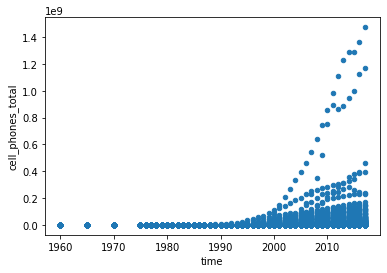

In [0]:
# Scatter plot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

cell_phones.plot.scatter('time', 'cell_phones_total')

### Part 2 - Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [0]:
inner = pd.merge(cell_phones , population, on=['geo', 'time'] , how='inner')
inner

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299
...,...,...,...,...
8585,zwe,2013,13633167.0,15054506
8586,zwe,2014,11798652.0,15411675
8587,zwe,2015,12757410.0,15777451
8588,zwe,2016,12878926.0,16150362


In [0]:
print(inner.shape)

(8590, 4)


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [0]:
new=pd.merge(inner, geo_country_codes[['geo', 'country']], on = 'geo', how = 'inner' )
new

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan
...,...,...,...,...,...
8585,zwe,2013,13633167.0,15054506,Zimbabwe
8586,zwe,2014,11798652.0,15411675,Zimbabwe
8587,zwe,2015,12757410.0,15777451,Zimbabwe
8588,zwe,2016,12878926.0,16150362,Zimbabwe


In [0]:
print(new.shape)

(8590, 5)


### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [0]:
new.head()

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


In [0]:
new['cellphone_per_person'] = new['cell_phones_total']/new['population_total']

new.head()

,geo,time,cell_phones_total,population_total,country,cellphone_per_person
0,afg,1960,0.0,8996351,Afghanistan,0.0
1,afg,1965,0.0,9938414,Afghanistan,0.0
2,afg,1970,0.0,11126123,Afghanistan,0.0
3,afg,1975,0.0,12590286,Afghanistan,0.0
4,afg,1976,0.0,12840299,Afghanistan,0.0


In [0]:
print(new.loc[(new ['time'] == 2017) & (new['country'] == 'United States')])

      geo  time  ...        country  cellphone_per_person
8134  usa  2017  ...  United States              1.220125

[1 rows x 6 columns]


### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [0]:
new.head()

,geo,time,cell_phones_total,population_total,country,cellphone_per_person
0,afg,1960,0.0,8996351,Afghanistan,0.0
1,afg,1965,0.0,9938414,Afghanistan,0.0
2,afg,1970,0.0,11126123,Afghanistan,0.0
3,afg,1975,0.0,12590286,Afghanistan,0.0
4,afg,1976,0.0,12840299,Afghanistan,0.0


In [0]:
new.describe()

,time,cell_phones_total,population_total,cellphone_per_person
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In [0]:
new.dropna(inplace = True)
new.describe(include='all')

,geo,time,cell_phones_total,population_total,country,cellphone_per_person
count,8590,8590.000000,8.590000e+03,8.590000e+03,8590,8590.000000
unique,195,NaN,NaN,NaN,195,NaN
top,kaz,NaN,NaN,NaN,Kiribati,NaN
freq,46,NaN,NaN,NaN,46,NaN
mean,NaN,1994.193481,9.004950e+06,2.983823e+07,NaN,0.279639
std,NaN,14.257975,5.573408e+07,1.161284e+08,NaN,0.454247
min,NaN,1960.000000,0.000000e+00,4.433000e+03,NaN,0.000000
25%,NaN,1983.000000,0.000000e+00,1.456148e+06,NaN,0.000000
50%,NaN,1995.000000,6.200000e+03,5.725062e+06,NaN,0.001564
75%,NaN,2006.000000,1.697652e+06,1.810581e+07,NaN,0.461149


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |


In [0]:
new.head()

,geo,time,cell_phones_total,population_total,country,cellphone_per_person
0,afg,1960,0.0,8996351,Afghanistan,0.0
1,afg,1965,0.0,9938414,Afghanistan,0.0
2,afg,1970,0.0,11126123,Afghanistan,0.0
3,afg,1975,0.0,12590286,Afghanistan,0.0
4,afg,1976,0.0,12840299,Afghanistan,0.0


In [0]:
new['country'].value_counts(dropna=False)[:5]

Kiribati      46
Comoros       46
Malta         46
Mauritania    46
Turkey        46
Name: country, dtype: int64

In [0]:
year_2017 = new[(new.time==2017)]
year_2017.head(10)


,geo,time,cell_phones_total,population_total,country,cellphone_per_person
45,afg,2017,23929713.0,35530081,Afghanistan,0.673506
91,ago,2017,13323952.0,29784193,Angola,0.447350
137,alb,2017,3497950.0,2930187,Albania,1.193763
183,and,2017,80337.0,76965,Andorra,1.043812
219,are,2017,19826224.0,9400145,United Arab Emirates,2.109140
265,arg,2017,61897379.0,44271041,Argentina,1.398146
311,arm,2017,3488524.0,2930450,Armenia,1.190440
396,aus,2017,27553000.0,24450561,Australia,1.126886
442,aut,2017,14924340.0,8735453,Austria,1.708479
488,aze,2017,10127000.0,9827589,Azerbaijan,1.030466


In [0]:
cell_2017 = year_2017.nlargest(5,'cell_phones_total')
cell_2017.head(6)

,geo,time,cell_phones_total,population_total,country,cellphone_per_person
1496,chn,2017,1.474097e+09,1409517397,China,1.045817
3595,ind,2017,1.168902e+09,1339180127,India,0.872849
3549,idn,2017,4.589232e+08,263991379,Indonesia,1.738402
8134,usa,2017,3.958810e+08,324459463,United States,1.220125
1084,bra,2017,2.364885e+08,209288278,Brazil,1.129966


In [0]:
cell_2017.loc[:,'cell_phones_total':'country'].head()

,cell_phones_total,population_total,country
1496,1.474097e+09,1409517397,China
3595,1.168902e+09,1339180127,India
3549,4.589232e+08,263991379,Indonesia
8134,3.958810e+08,324459463,United States
1084,2.364885e+08,209288278,Brazil


In [0]:
cell_2017[['time','country','cell_phones_total']]

,time,country,cell_phones_total
1496,2017,China,1.474097e+09
3595,2017,India,1.168902e+09
3549,2017,Indonesia,4.589232e+08
8134,2017,United States,3.958810e+08
1084,2017,Brazil,2.364885e+08


## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:

- You can make a crosstab. 
- You're going to want occupations as the column indexes and years as the row indexes
- Use the `normalize` parameter to get percentages by year.

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [53]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [153]:
graf = pd.crosstab(df.Occupation, df.Year, normalize='columns') * 100
graf

                  

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Occupation,,,,,,,,,,,,,,,,,
"Acting, Comedy & Music",90.361446,73.964497,72.611465,62.264151,56.024096,38.414634,37.037037,36.024845,25.531915,20.731707,20.858896,35.151515,33.742331,26.829268,42.771084,39.263804,45.0
Government and Politics,1.204819,8.284024,3.821656,6.918239,10.240964,22.560976,16.049383,19.254658,17.021277,20.121951,20.858896,18.181818,16.564417,20.121951,12.650602,12.883436,17.0
Media,6.626506,12.426036,19.745223,26.415094,24.698795,27.439024,33.333333,29.192547,33.333333,46.951220,36.196319,30.303030,31.288344,31.707317,30.722892,32.515337,24.0
Other,1.807229,5.325444,3.821656,4.402516,9.036145,11.585366,13.580247,15.527950,24.113475,12.195122,22.085890,16.363636,18.404908,21.341463,13.855422,15.337423,14.0


In [377]:
# or years as a row index
graf1 = pd.crosstab(df.Year, df.Occupation, normalize='index') * 100
graf1

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,90.361446,1.204819,6.626506,1.807229
2000,73.964497,8.284024,12.426036,5.325444
2001,72.611465,3.821656,19.745223,3.821656
2002,62.264151,6.918239,26.415094,4.402516
2003,56.024096,10.240964,24.698795,9.036145
2004,38.414634,22.560976,27.439024,11.585366
2005,37.037037,16.049383,33.333333,13.580247
2006,36.024845,19.254658,29.192547,15.527950
2007,25.531915,17.021277,33.333333,24.113475


### Part 2 — Recreate this explanatory visualization:



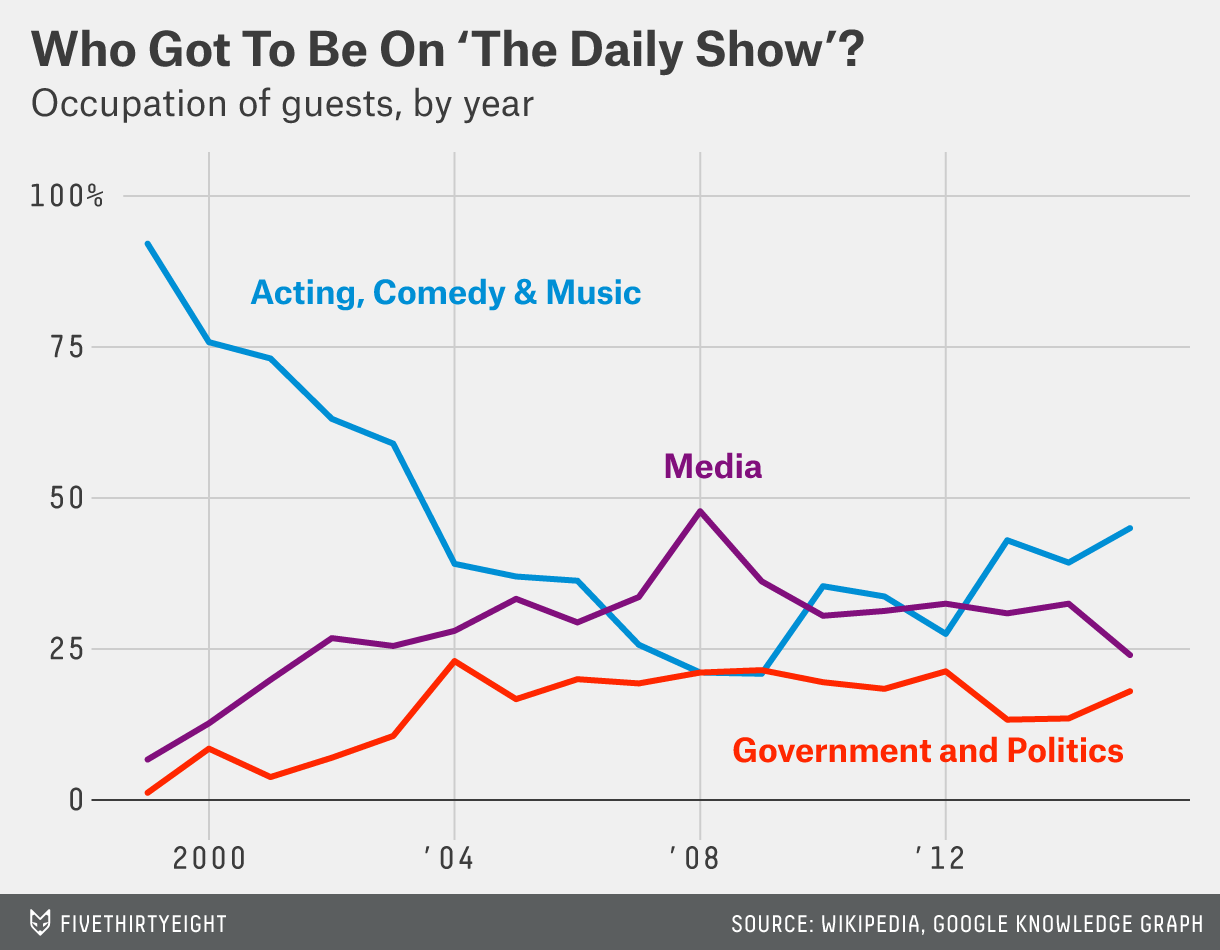

In [43]:
from IPython.display import display, Image
png ='https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

In [378]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [380]:
years = graf1.index.tolist()
years

[1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

Text(2007.1, 52, 'Media')

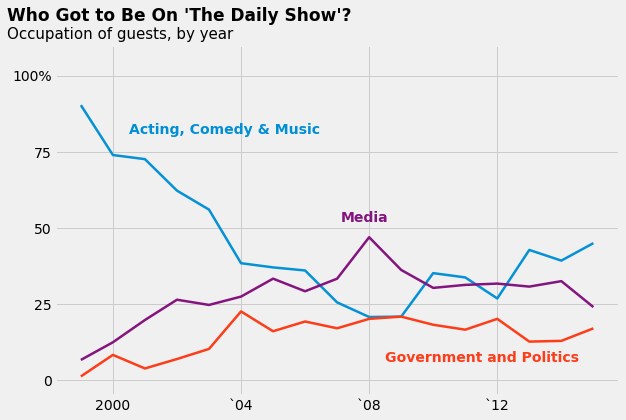

In [381]:
# Setting FiveThirtyEight style
plt.style.use('fivethirtyeight')


fig, ax = plt.subplots(figsize=(9,6))
    

ax1 = sns.lineplot(x=years, y=graf['Acting, Comedy & Music'].tolist(), color='#0591D5', lw=2.5)
ax2 = sns.lineplot(x=years, y=graf['Government and Politics'].tolist(), color='#FD3D1A', lw=2.5)
ax3 = sns.lineplot(x=years, y=graf['Media'].tolist(), color='#84157F', lw=2.5)

plt.ylim(-5,110)
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(labels=['0', '25', '50', '75', '100%'], fontsize=14)

ax.set_xticks([2000, 2004, 2008, 2012])
ax.set_xticklabels(['2000', '`04', '`08', '`12'], fontsize=14)


ax.text(x=1996.7, y=118,s= "Who Got to Be On 'The Daily Show'?", fontsize=17, fontweight='bold')


ax.text(x=1996.7, y=112, s='Occupation of guests, by year', fontsize=15)

ax.text(x=2000.5, y=81, s="Acting, Comedy & Music", fontsize=14, fontweight='bold', color='#008FD5')
ax.text(x=2008.5, y=6, s="Government and Politics", fontsize=14, fontweight='bold', color='#FD3D1A')
ax.text(x=2007.1, y=52, s="Media", fontsize=14, fontweight='bold', color='#84157F')

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend **or** labels for the lines. (But **you don't need each label positioned next to its line or colored like 538.**)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

## How to get a 3 on this Sprint Challenge:

Once you have completed the above making a solid attempt at each section, if you still have time remaining, you can go back and do any of the following to get a score of 3 on the above sections. Remember that everything in this section is **optional** and that we will average your scores between the different sections, so get the easy points first!

Complete any of the following **within** their corresponding sections in the Sprint Challenge (go back up and add these thigns):

### Data Wrangling Section 1

Filter the `cell_phones` dataframe to only include information about the USA and China and then remake the scatterplot. 

### Data Wrangling Section 2

Explain why we are using an "inner" join when we merge these dataframes. 

### Data Wrangling Section 3

Modify the geo column to make the geo codes uppercase instead of lowercase.

### Data Wrangling Section 4

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

### Data Storytelling 

Keep on working on your graph to make it look particularly like the 538 graph by manipulating the graph's background color, the line colors, the x and y axis tick marks/labels, and adding a subtitle. 

If you have already completed everything else, take this as far as you can within the time limit.


In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

geo_country_codes = geo_country_codes[['geo','country']]

In [7]:
inner = pd.merge(cell_phones , population, on=['geo', 'time'] , how='inner')
inner

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299
...,...,...,...,...
8585,zwe,2013,13633167.0,15054506
8586,zwe,2014,11798652.0,15411675
8587,zwe,2015,12757410.0,15777451
8588,zwe,2016,12878926.0,16150362


In [10]:
new=pd.merge(inner, geo_country_codes[['geo', 'country']], on = 'geo', how = 'inner' )
new

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan
...,...,...,...,...,...
8585,zwe,2013,13633167.0,15054506,Zimbabwe
8586,zwe,2014,11798652.0,15411675,Zimbabwe
8587,zwe,2015,12757410.0,15777451,Zimbabwe
8588,zwe,2016,12878926.0,16150362,Zimbabwe


In [11]:
only_us_ch = new[(new.country == 'United States')],new[(new.country == "China")]
only_us_ch

(      geo  time  cell_phones_total  population_total        country
 8092  usa  1960                0.0         186808228  United States
 8093  usa  1965                0.0         199815540  United States
 8094  usa  1970                0.0         209588150  United States
 8095  usa  1975                0.0         219205296  United States
 8096  usa  1976                0.0         221239215  United States
 8097  usa  1977                0.0         223324042  United States
 8098  usa  1978                0.0         225449657  United States
 8099  usa  1979                0.0         227599878  United States
 8100  usa  1980                0.0         229763052  United States
 8101  usa  1984            91600.0         238573861  United States
 8102  usa  1985           340213.0         240824120  United States
 8103  usa  1986           681825.0         243098935  United States
 8104  usa  1987          1230855.0         245402864  United States
 8105  usa  1988          2069441.

In [12]:
new.head()

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


In [13]:
new['geo'].str.upper()

0       AFG
1       AFG
2       AFG
3       AFG
4       AFG
       ... 
8585    ZWE
8586    ZWE
8587    ZWE
8588    ZWE
8589    ZWE
Name: geo, Length: 8590, dtype: object

In [21]:
new1 = new[(new.country == 'United States')]
new1

,geo,time,cell_phones_total,population_total,country
8092,usa,1960,0.0,186808228,United States
8093,usa,1965,0.0,199815540,United States
8094,usa,1970,0.0,209588150,United States
8095,usa,1975,0.0,219205296,United States
8096,usa,1976,0.0,221239215,United States
8097,usa,1977,0.0,223324042,United States
8098,usa,1978,0.0,225449657,United States
8099,usa,1979,0.0,227599878,United States
8100,usa,1980,0.0,229763052,United States
8101,usa,1984,91600.0,238573861,United States


In [23]:
new1.sort_values('population_total', ascending = False). head(10)

,geo,time,cell_phones_total,population_total,country
8134,usa,2017,395881000.0,324459463,United States
8133,usa,2016,395881000.0,322179605,United States
8132,usa,2015,382307000.0,319929162,United States
8131,usa,2014,355500000.0,317718779,United States
8130,usa,2013,310698000.0,315536676,United States
8129,usa,2012,304838000.0,313335423,United States
8128,usa,2011,297404000.0,311051373,United States
8127,usa,2010,285118000.0,308641391,United States
8126,usa,2009,274283000.0,306076362,United States
8125,usa,2008,261300000.0,303374067,United States


In [30]:
new1.loc[new1['cell_phones_total'] >= 355500000, ['cell_phones_total', 'population_total', 'time']]

,cell_phones_total,population_total,time
8131,355500000.0,317718779,2014
8132,382307000.0,319929162,2015
8133,395881000.0,322179605,2016
8134,395881000.0,324459463,2017
